Rate: 1.0
dataset: 142
trainingSet:  14
testSet:  128

Accuracy: 92.1875%
Erro rate:7.8125

Rate: 2.0
dataset: 142
trainingSet:  28
testSet:  114

Accuracy: 90.35087719298247%
Erro rate:9.649122807017534

Rate: 3.0
dataset: 142
trainingSet:  42
testSet:  100

Accuracy: 95.0%
Erro rate:5.0

Rate: 4.0
dataset: 142
trainingSet:  56
testSet:  86

Accuracy: 95.34883720930233%
Erro rate:4.6511627906976685

Rate: 5.0
dataset: 142
trainingSet:  71
testSet:  71

Accuracy: 95.77464788732394%
Erro rate:4.225352112676063

Rate: 6.0
dataset: 142
trainingSet:  85
testSet:  57

Accuracy: 96.49122807017544%
Erro rate:3.5087719298245617

Rate: 7.0
dataset: 142
trainingSet:  99
testSet:  43

Accuracy: 95.34883720930233%
Erro rate:4.6511627906976685

Rate: 8.0
dataset: 142
trainingSet:  113
testSet:  29

Accuracy: 100.0%
Erro rate:0.0

Rate: 9.0
dataset: 142
trainingSet:  127
testSet:  15

Accuracy: 100.0%
Erro rate:0.0

Max Accuracy: 100.0
Min Accuracy: 90.35087719298247
Mean Accuracy: 95.61132528545406

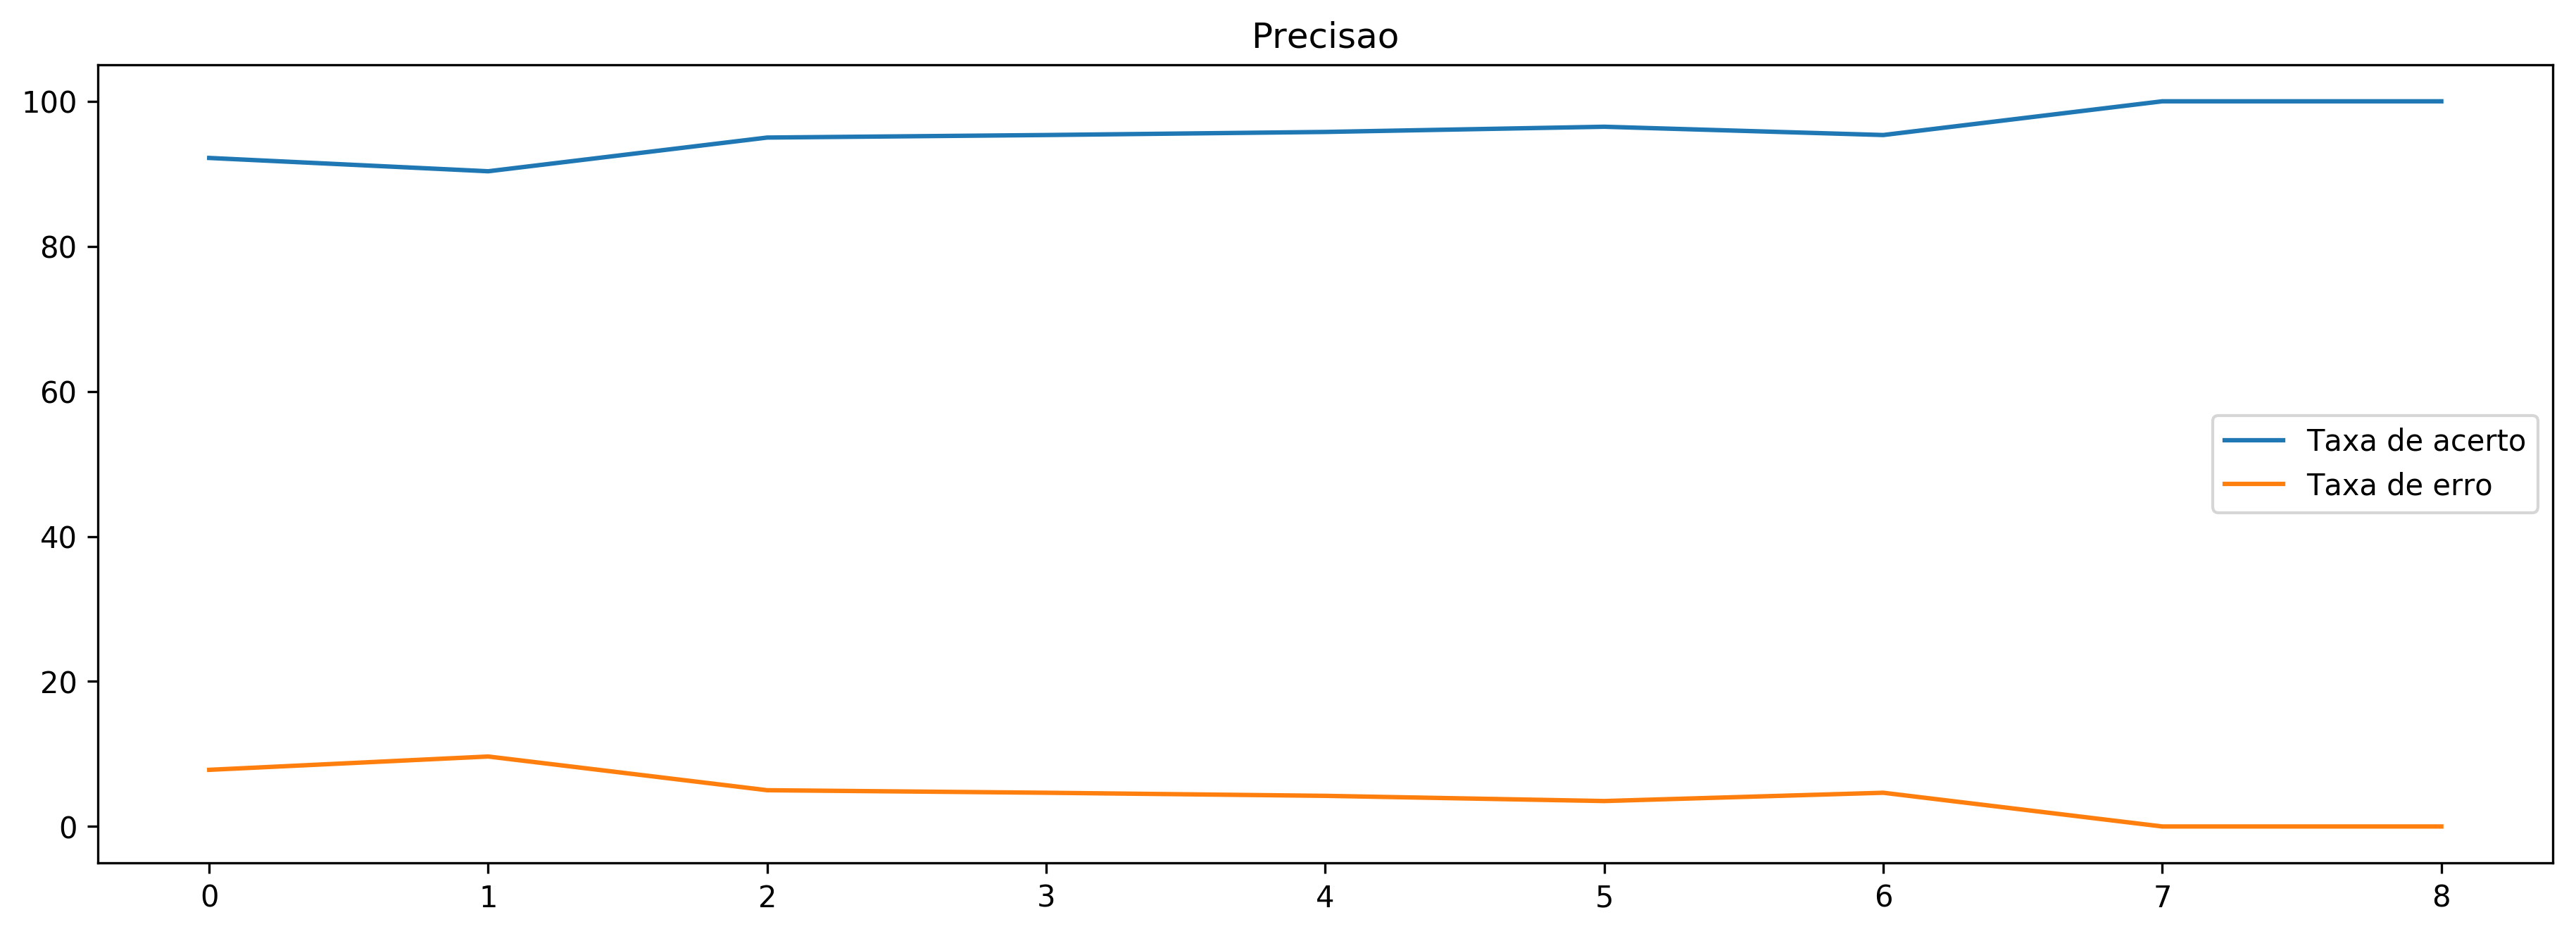

In [3]:
import csv
import random
import math
import operator
import numpy as np
import matplotlib.pyplot as plt


def carregar_arq(nome_arq):
    linhas = csv.reader(open(nome_arq, "rt"))
    conjunto_de_dados = list(linhas)
    for i in range(len(conjunto_de_dados)):
        conjunto_de_dados[i] = [float(x) for x in conjunto_de_dados[i]]
    return conjunto_de_dados


def divisao_de_dados(conjunto_de_dados, divisao):
    treino_tamanho = int(len(conjunto_de_dados) * divisao)
    conjunto_de_treino = []
    copia = list(conjunto_de_dados)
    while len(conjunto_de_treino) < treino_tamanho:
        indice = random.randrange(len(copia))
        conjunto_de_treino.append(copia.pop(indice))
    return [conjunto_de_treino, copia]


def distanciaEuclidiana(instancia1, instancia2, tamanho):
    distancia = 0
    for x in range(tamanho):
        distancia += pow((instancia1[x] - instancia2[x]), 2)
    return math.sqrt(distancia)

def retirarOutlier(conjunto_de_dados):
    mean = np.mean(conjunto_de_dados, axis=0)
    std = np.std(conjunto_de_dados, axis=0)

    lti = mean - 2 * std
    lts = mean + 2 * std

    for i in conjunto_de_dados:
        if (i > lts).any():
            conjunto_de_dados.remove(i)
    for j in conjunto_de_dados:
        if (j < lti).any():
            conjunto_de_dados.remove(j)

    return conjunto_de_dados


def Vizinhos(dadosTreino, instanciaTeste, k):
    distancias = []
    length = len(instanciaTeste) - 1
    for x in range(len(dadosTreino)):
        dist = distanciaEuclidiana(instanciaTeste, dadosTreino[x], length)
        distancias.append((dadosTreino[x], dist))
    distancias.sort(key=operator.itemgetter(1))
    vizinhos = []
    for x in range(k):
        vizinhos.append(distancias[x][0])
    return vizinhos


def Resposta(vizinhos):
    classes = {}
    for x in range(len(vizinhos)):
        resultado = vizinhos[x][-1]
        if resultado in classes:
            classes[resultado] += 1
        else:
            classes[resultado] = 1
    ordenando_resultados = sorted(classes.items(), key=operator.itemgetter(1), reverse=True)
    return ordenando_resultados[0][0]


def Acertos(dadosTeste, predicoes):
    correto = 0
    for x in range(len(dadosTeste)):
        if dadosTeste[x][-1] == predicoes[x]:
            correto += 1
    return (correto / float(len(dadosTeste))) * 100.0


def main():
    nome_arq = 'Iris dataset.csv'
    conjunto_de_dados = carregar_arq(nome_arq)
    k = 1
    taxa_erro = []
    lista_acertos = []

    conjunto_de_dados = retirarOutlier(conjunto_de_dados)

    for i in range(10, 100, 10):
        divisao = i/100
        print("Rate:",i/10)
        conjunto_de_treino, conjunto_de_teste = divisao_de_dados(conjunto_de_dados, divisao)
        print("dataset:",len(conjunto_de_dados))
        print("trainingSet: ", len(conjunto_de_treino))
        print("testSet: ", len(conjunto_de_teste))

        predicoes = []
        for x in range(len(conjunto_de_teste)):
            vizinhos = Vizinhos(conjunto_de_treino, conjunto_de_teste[x], k)
            resultado = Resposta(vizinhos)
            predicoes.append(resultado)
        acuracia = Acertos(conjunto_de_teste, predicoes)
        lista_acertos.append(acuracia)

        print('\nAccuracy: %s' % acuracia + '%')
        print("Erro rate:{}\n".format(100 - acuracia))
        taxa_erro.append(100-acuracia)


    print("Max Accuracy:", max(lista_acertos))
    print("Min Accuracy:", min(lista_acertos))
    print("Mean Accuracy:", np.mean(lista_acertos))

    plt.figure(1, figsize=(15, 5), dpi = 300)
    plt.plot(lista_acertos, label="Taxa de acerto")
    plt.plot(taxa_erro, label="Taxa de erro")
    plt.title("Precisao")
    plt.legend()
    plt.show
    

main()
